In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [65]:
waist_data=pd.read_csv(r"C:\Users\chana\Downloads\WC_AT.csv")
waist_data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [20]:
waist_data2=waist_data

C:\Users\chana\AppData\Local\Temp\ipykernel_9644\4176628557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(waist_data['Waist'])


<Axes: xlabel='Waist', ylabel='Density'>

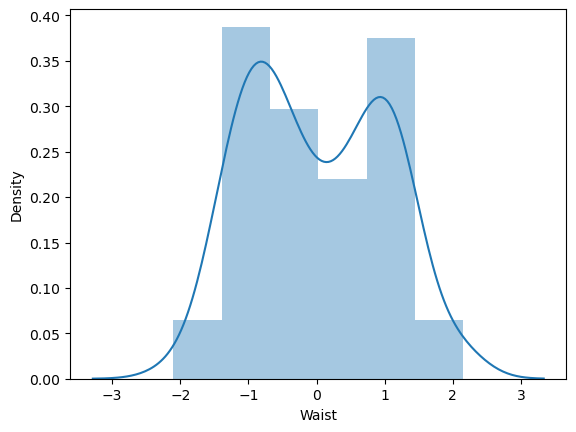

In [55]:
sns.distplot(waist_data['Waist'])

In [66]:
model3=smf.ols('AT~ Waist',data=waist_data).fit()

In [67]:
model3.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [68]:
model3.predict(test)

0      8.844373
1    302.847421
2    -77.627112
3     33.056388
dtype: float64

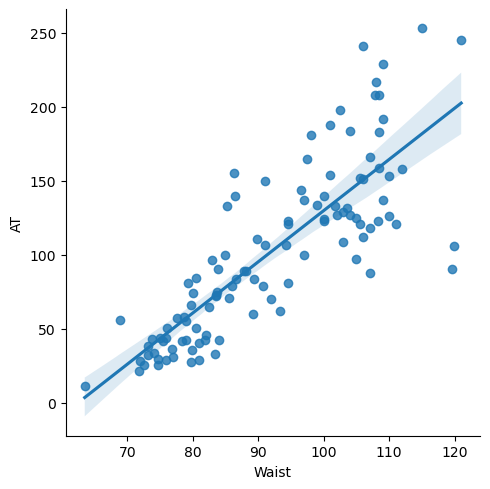

In [4]:
sns.lmplot(x='Waist',y='AT',data=waist_data)

<Axes: xlabel='Waist', ylabel='Count'>

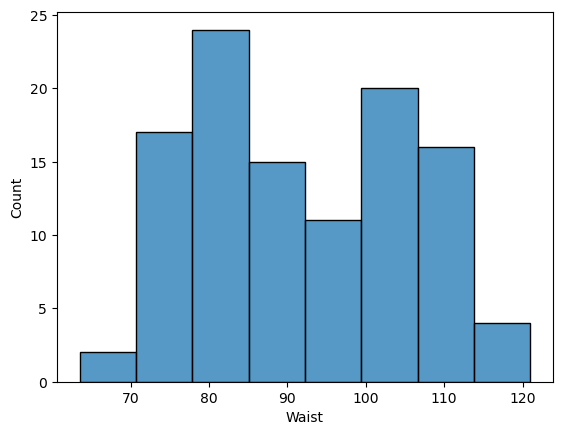

In [5]:
sns.histplot(x='Waist',data=waist_data)

In [7]:
waist_data['Waist'].skew()

0.1340560824786468

In [14]:
X=waist_data.drop(['AT'],axis=1)
X

,Waist
0,74.75
1,72.60
2,81.80
3,83.95
4,74.65
...,...
104,100.10
105,93.30
106,101.80
107,107.90


In [8]:
waist_data['Waist'].kurtosis()

-1.1026666011768886

In [9]:
from sklearn.preprocessing import StandardScaler

In [16]:
scalar=StandardScaler()

In [69]:
waist_data['Waist_scaled']=scalar.fit_transform(waist_data[['Waist']])

In [70]:
waist_data

,Waist,AT,Waist_scaled
0,74.75,25.72,-1.270810
1,72.60,25.89,-1.430107
2,81.80,42.60,-0.748463
3,83.95,42.80,-0.589166
4,74.65,29.84,-1.278219
...,...,...,...
104,100.10,124.00,0.607417
105,93.30,62.20,0.103593
106,101.80,133.00,0.733373
107,107.90,208.00,1.185332


In [63]:
X=waist_data.drop(['AT'],axis=1)
y=waist_data['AT']

In [64]:
X

,Waist
0,-1.270810
1,-1.430107
2,-0.748463
3,-0.589166
4,-1.278219
...,...
104,0.607417
105,0.103593
106,0.733373
107,1.185332


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model=LinearRegression()

In [41]:
model.fit(X,y)

LinearRegression()

In [73]:
test=pd.DataFrame({'Waist_scaled':[65,150,40,72]})
test

,Waist_scaled
0,65
1,150
2,40
3,72


In [76]:
test_scaled=scalar.fit_transform(test)
test_scaled

array([[-0.40694346],
       [ 1.65814276],
       [-1.01432176],
       [-0.23687754]])

In [81]:
test['Waist_scaled']=test_scaled
test
test.drop(['Waist_scales'])


KeyError: "['Waist_scales'] not found in axis"

In [84]:
test=test.drop(['Waist_scales'],axis=1)

In [85]:
test

,Waist_scaled
0,-0.406943
1,1.658143
2,-1.014322
3,-0.236878


In [59]:
model.predict(test)

array([3136.31806492, 7104.41102491, 1969.23190022, 3463.10219104])

In [52]:
model.intercept_

101.89403669724769

In [71]:
model_2=smf.ols('AT~Waist_scaled',data=waist_data).fit()

In [87]:
model_2.predict(test)

0     82.896513
1    179.301856
2     54.542001
3     90.835777
dtype: float64

In [51]:
model_2.params

Intercept    101.894037
Waist         46.683447
dtype: float64

In [57]:
model_2.predict(X)

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64